### CIC is looking for you to make suggestions about potential “rules” that they could implement with Jornaya data to positively impact their lead-buying strategy. For example, these are some good questions and points to start with:
- Based on the data available, is there a certain type of lead that CIC should not bother purchasing?
- Are there consumers that CIC should prioritize purchase and trying to contact? 
- What are the characteristics of the leads that CIC should not and should prioritize purchasing, and how can they implement rules using Jornaya data to distinguish these leads?
- How much of a difference does having Jornaya data available make vs. not having it available?
- Remember we are aiming to prove Jornaya’s data can have a meaningful and valuable impact to CIC, so showing numbers for how these rules can affect CIC will increase the strength of your story.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stats

import wrangle

In [2]:
df = pd.read_csv('clean_CIC.csv').set_index('token')

In [3]:
df.head()

,provider,lead_cost,contact,purchase,lead_age,lead_duration,field_count,competitors,provider_a,provider_b,provider_c,provider_d
token,,,,,,,,,,,,
1,C,50,0,0,74,962,10,2,0,0,1,0
2,C,50,0,0,47,617,9,3,0,0,1,0
3,A,75,0,0,7,94,14,1,1,0,0,0
4,C,75,0,0,29,104,15,1,0,0,1,0
5,D,75,0,0,27,82,9,1,0,0,0,1


In [4]:
df.shape

(554, 12)

___

## Make more dummies to explore with

### Lead cost

In [5]:
# dummy lead cost feature
dummy_df =  pd.get_dummies(df['lead_cost'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['lead_costs_25', 'lead_costs_50', 
                    'lead_costs_75', 'lead_costs_100']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

### Competitors

In [6]:
# dummy competitors feature
dummy_df =  pd.get_dummies(df['competitors'])
# name the new columns (goes in order of value counts high to low)
dummy_df.columns = ['competitors_0', 'competitors_1', 
                    'competitors_2', 'competitors_3']
# concat the dummies to the main data frame
df = pd.concat([df, dummy_df], axis=1)

___

## Split the data

In [7]:
train, validate, test = wrangle.split_CIC(df)
X_train, X_validate, X_test, y_train, y_validate, y_test = wrangle.split_train_validate_test(train, validate, test) 
train_scaled, validate_scaled, test_scaled = wrangle.scale_my_data(train, validate, test)

___

### Field Count
- The number of field needed to submit form

/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


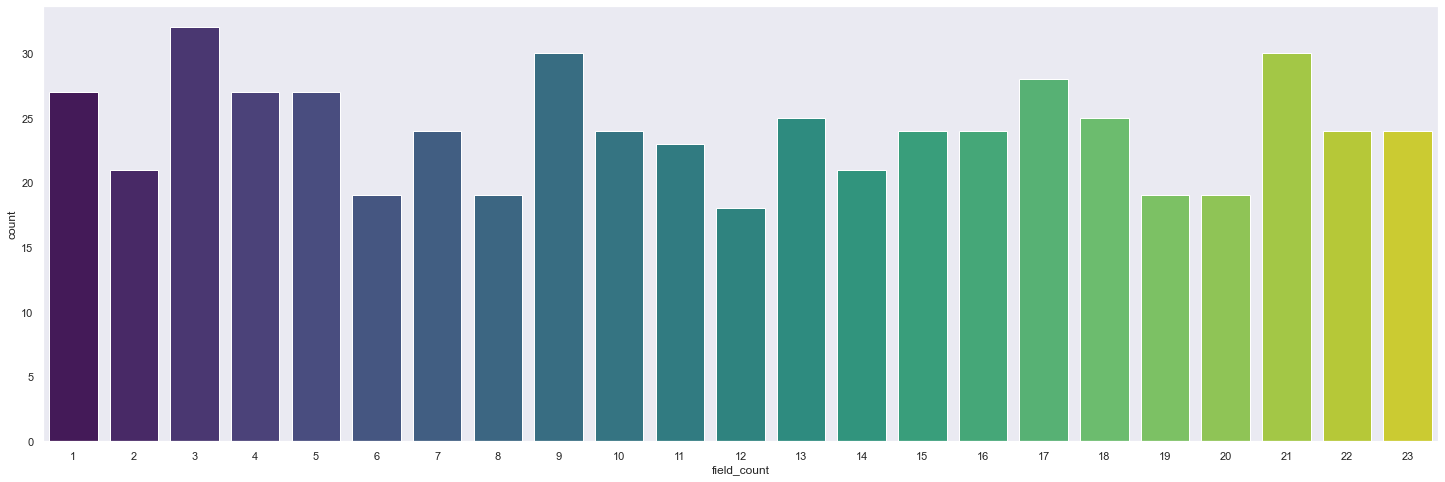

In [8]:
plt.figure(figsize=(25,8))
sns.set(style="dark")
sns.countplot(df['field_count'], palette='viridis')
plt.show()

### Takeaways:
- Nothing really stands out

### Questions Arised:
- Is there a field count that mostly plays into a purchase not being made?
    - For example are the hgiher number of field counts mean that a customer is more interested? 
    - Or is the higher the number attributing to a lower chance of purchasing?

___

3. Is the purchase affected by the number of fields required on the submission form?

In [9]:
bought = df[df['purchase'] == 1]
field_bought = bought.groupby('field_count').count()
#code_reasons.sort_values(by = 'open_date', ascending = False)

field_bought

,provider,lead_cost,contact,purchase,lead_age,lead_duration,competitors,provider_a,provider_b,provider_c,provider_d,lead_costs_25,lead_costs_50,lead_costs_75,lead_costs_100,competitors_0,competitors_1,competitors_2,competitors_3
field_count,,,,,,,,,,,,,,,,,,,
1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
2,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
4,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
7,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
8,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
9,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
10,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
11,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


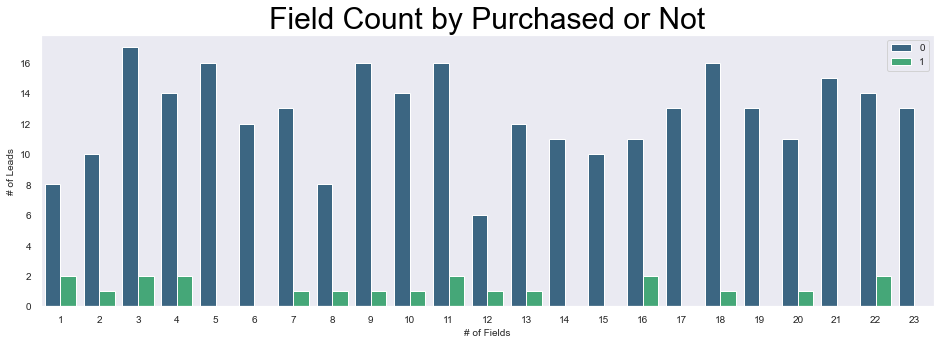

In [10]:
plt.figure(figsize=(16,5))
sns.countplot(data=train, x='field_count', hue='purchase', palette='viridis')
plt.title("Field Count by Purchased or Not", size=30, color='black')
plt.xlabel("# of Fields", size=10)
plt.ylabel('# of Leads', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

### Takeaways:
- Fields 1, 3, 4, 11, 16, and 22 each had 2 leads purchase from CIC
- Fields 2, 7, 8, 9 10,12, 13, 18, and 20 each only had 1 lead purchase with CIC
- Fields 5, 6, 14, 15, 17, 19, 21, and 23 had no leads purchase from CIC

it doesnt seem that field count has much to do with if a lead will or will not purchas with CIC

___

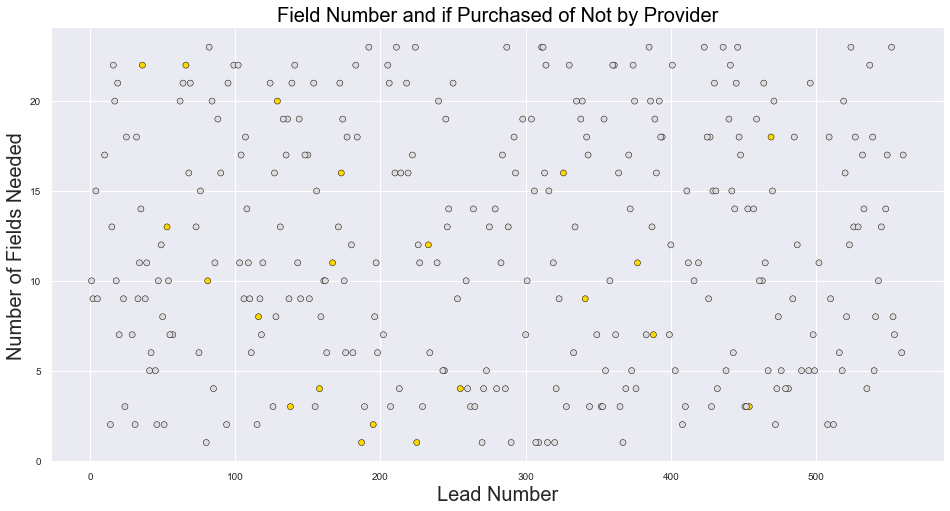

In [17]:
plt.figure(figsize=(16,8))
sns.set(style="darkgrid")
clrs = ['gainsboro', 'gold']
sns.scatterplot(data=train, x=train.index, y='field_count', hue='purchase', palette=clrs, 
                edgecolor='black', legend=None)
plt.title("Field Number and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Lead Number", size=20)
plt.ylabel('Number of Fields Needed', size=20)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.savefig("duration_scatter", transparent=True)

No handles with labels found to put in legend.
No handles with labels found to put in legend.


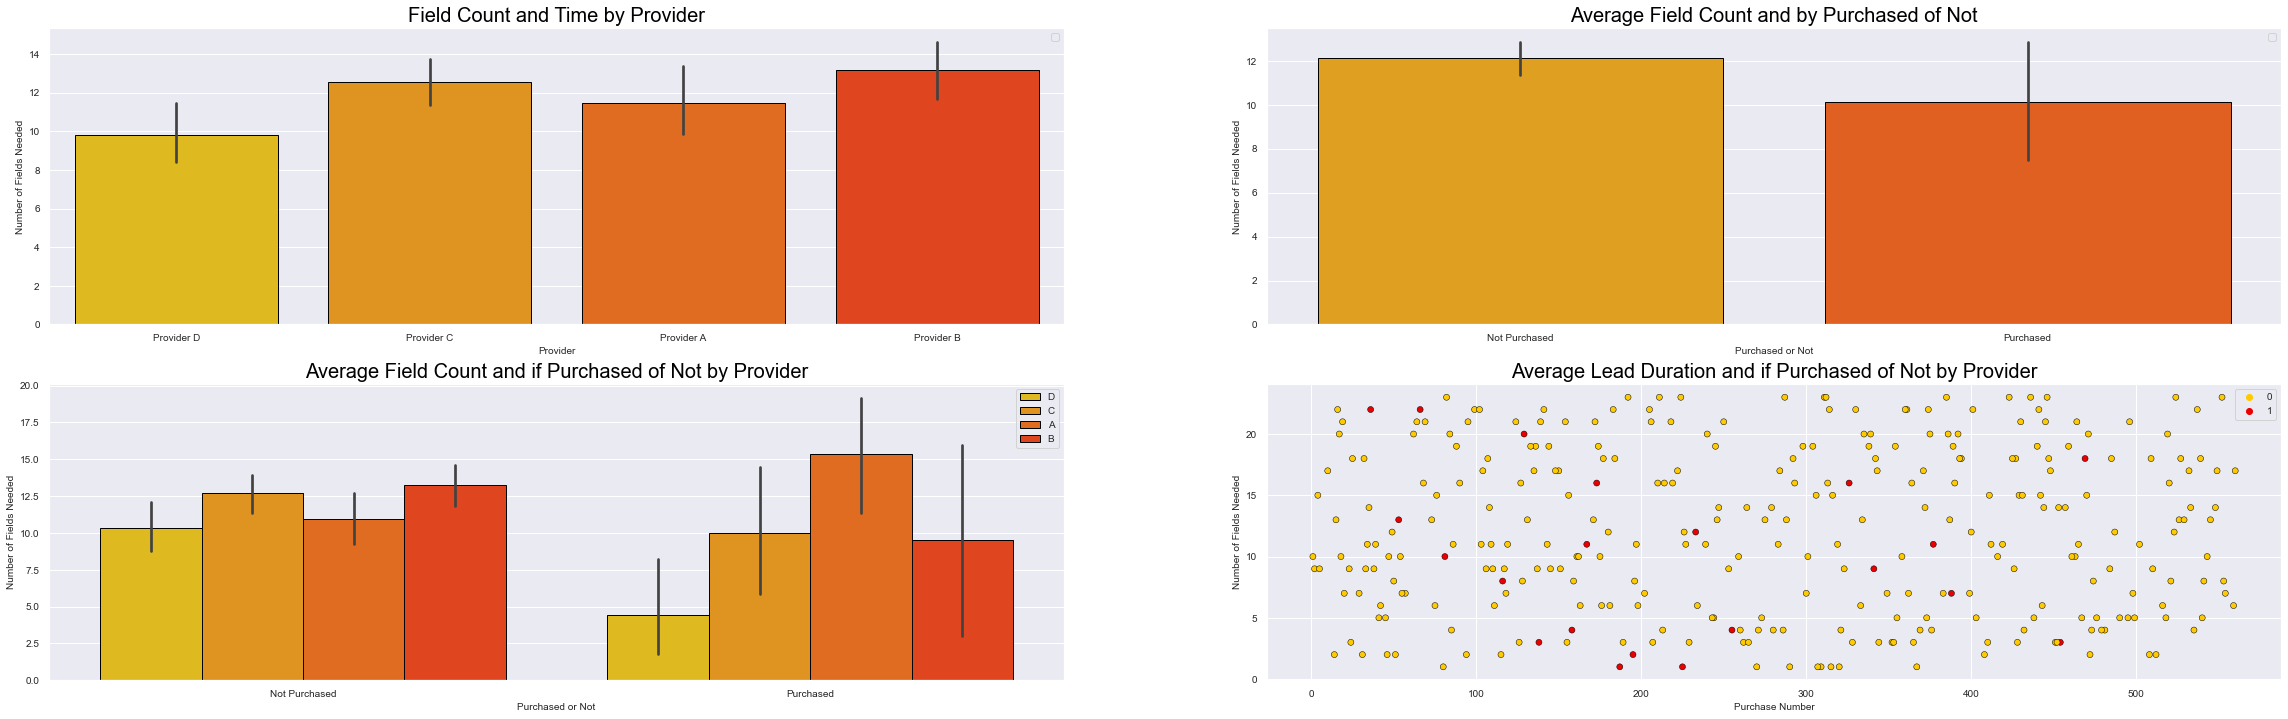

In [19]:
plt.subplots(2,2, figsize=(40,12), sharey=True)
sns.set(style="darkgrid")

plt.subplot(2,2,1)
sns.barplot(data=train, x='provider', y='field_count', palette='autumn_r', edgecolor='black')
plt.title("Field Count and Time by Provider", size=20, color='black')
plt.xlabel("Provider", size=10)
plt.ylabel('Number of Fields Needed', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1, 2, 3], ['Provider D', 'Provider C', 'Provider A', 'Provider B'])

plt.subplot(2,2,2)
sns.barplot(data=train, x='purchase', y='field_count', palette='autumn_r', edgecolor='black')
plt.title("Average Field Count and by Purchased of Not", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Number of Fields Needed', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,3)
sns.barplot(data=train, x='purchase', y='field_count', hue='provider', palette='autumn_r', edgecolor='black')
plt.title("Average Field Count and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchased or Not", size=10)
plt.ylabel('Number of Fields Needed', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})
plt.xticks([0,1], ['Not Purchased', 'Purchased'])

plt.subplot(2,2,4)
sns.scatterplot(data=train, y='field_count', x=train.index, hue='purchase', palette='hot_r', edgecolor='black')
plt.title("Average Lead Duration and if Purchased of Not by Provider", size=20, color='black')
plt.xlabel("Purchase Number", size=10)
plt.ylabel('Number of Fields Needed', size=10)
plt.xticks(fontsize=10) 
plt.yticks(fontsize=10) 
plt.legend(loc='upper right', prop={'size': 10})

plt.show()

### Purchase & field count
Using pearsonr
- doing this to see if there is a correltation becterrn purchand and field count

Using Anova test
- I am doing this because one of the the 2 'categorical' variables has more than 2 categories

### First Pearson R

In [13]:
null_hypothesis = "There is no correlation between number of purchases and number of fields on a submission form."
alt_hypothesis = "There is a correlation between number of purchases and number of fields on a submission form."
confidence_level = .95
a = 1 - confidence_level
x = train.purchase
y= train.field_count

corr, p = stats.pearsonr(x, y)
print(f' The correlation between purchase and the field count is: \n', corr)
print(f' The P value between purchase and pield count is: \n', p)

 The correlation between purchase and the field count is: 
 -0.07489431645346789
 The P value between purchase and pield count is: 
 0.18845235275962346


In [14]:
if p < a:
    print(f"Reject null hypothesis: \n'{null_hypothesis}'")
    print(' ')
    print(f"We now move forward with our alternative hypothesis: \n'{alt_hypothesis}'")
    print(' ')
    if 0 < corr < .6:
        print("This is a weak positive correlation.")
    elif .6 < corr < 1:
        print("That is a strong positive correlation.")
    elif -.6 < corr < 0:
        print("This is a weak negative correlation.")
    elif -1 < corr < -.6:
        print("That is a strong negative correlation.")
    
else : 
    print("Fail to reject the null hypothesis.")

Fail to reject the null hypothesis.


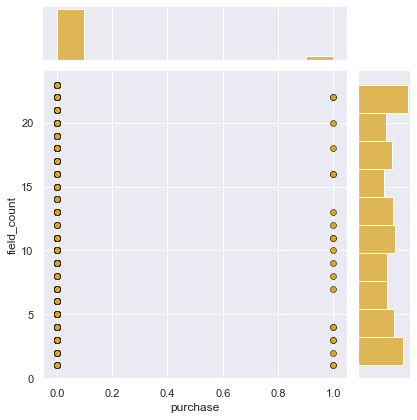

In [15]:
sns.jointplot(data=train, x='purchase', y='field_count', color='goldenrod', edgecolor='black')

### Now Anova

In [16]:
n = train.shape[0]     # number of observations
degf = n - 2        # degrees of freedom: the # of values in the final calculation of a statistic that are free to vary.
alpha = 0.05
null_hypothesis = 'there is no difference in purchase between the number of fields in a form.'
F, p = stats.f_oneway( 
    train.purchase[train.field_count==1],
    train.purchase[train.field_count==2],
    train.purchase[train.field_count==3],
    train.purchase[train.field_count==4],
    train.purchase[train.field_count==5],
    train.purchase[train.field_count==6],
    train.purchase[train.field_count==7],
    train.purchase[train.field_count==8],
    train.purchase[train.field_count==9],
    train.purchase[train.field_count==10],
    train.purchase[train.field_count==11],
    train.purchase[train.field_count==12],
    train.purchase[train.field_count==13],
    train.purchase[train.field_count==14],
    train.purchase[train.field_count==15],
    train.purchase[train.field_count==16],
    train.purchase[train.field_count==17],
    train.purchase[train.field_count==18],
    train.purchase[train.field_count==19],
    train.purchase[train.field_count==20],
    train.purchase[train.field_count==21],
    train.purchase[train.field_count==22],
    train.purchase[train.field_count==23])
if p > alpha:
    print("We fail to reject the null hypothesis. The null hypothesis is that", null_hypothesis)
else:
    print("We reject the null hypothesis that", null_hypothesis)

We fail to reject the null hypothesis. The null hypothesis is that there is no difference in purchase between the number of fields in a form.
